In [1]:
import imagej
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# initialize ImageJ
ij = imagej.init('sc.fiji:fiji:2.14.0') 
print(f"ImageJ version: {ij.getVersion()}")

ImageJ version: 2.14.0/1.54f


In [2]:
from PIL import Image

img = Image.open(r"C:\Users\magfa\Documents\Prosjekt\Prosjektbilder\6ps_100xto1000x\org_0nbr_5.tif")

upscaled_img = img.resize((2560, 1790), Image.Resampling.LANCZOS)

upscaled_img.save("upscaled.png")

In [3]:
def chinese_mask(n): #Returns cleaned up image as NumPy array
    
    original = np.asarray(ij.py.from_java(n))
    ij.IJ.setThreshold(n, 190, 255)
    ij.IJ.run(n, "Convert to Mask", '')

    for i in range(1):
        ij.IJ.run(n, "Despeckle", "")

    noisy = np.asarray(ij.py.from_java(n))

    for i in range(1):
        ij.IJ.run(n, "Subtract Background...", "rolling=2")

    noise = np.asarray(ij.py.from_java(n))

    cleaned_up = noisy - noise

    binary_mask = cleaned_up / 255 # White pixels get value 1 - Black pixels get value 0

    return (binary_mask > 0.5).astype(int) #Ensures array contains only values 0 or 1

def full_mask(n): #Returns cleaned up image as NumPy array
    
    original = np.asarray(ij.py.from_java(n))
    ij.IJ.setThreshold(n, 143, 255)
    ij.IJ.run(n, "Convert to Mask", '')

    for i in range(1):
        ij.IJ.run(n, "Despeckle", "")

    noisy = np.asarray(ij.py.from_java(n))

    for i in range(1):
        ij.IJ.run(n, "Subtract Background...", "rolling=2")

    noise = np.asarray(ij.py.from_java(n))

    cleaned_up = noisy - noise

    binary_mask = cleaned_up / 255 # White pixels get value 1 - Black pixels get value 0

    return (binary_mask > 0.5).astype(int) #Ensures array contains only values 0 or 1

Operating in headless mode - the original ImageJ will have limited functionality.
Operating in headless mode - the IJ class will not be fully functional.


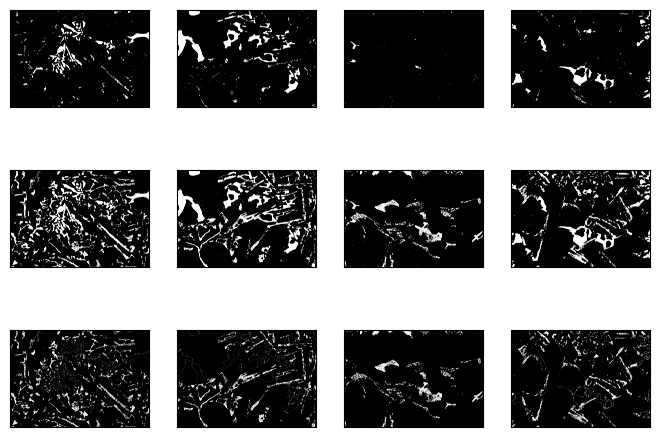

In [4]:
from scipy.ndimage import binary_erosion, binary_dilation

imp = ij.IJ.openImage(r"C:\Users\magfa\Documents\Prosjekt\Prosjektbilder\6ps_250xto1000x_upscaled\org_0nbr_0_upscaled.tif")
imp2 = ij.IJ.openImage(r"C:\Users\magfa\Documents\Prosjekt\Prosjektbilder\6ps_250xto1000x_upscaled\org_0nbr_1_upscaled.tif")
imp3 = ij.IJ.openImage(r"C:\Users\magfa\Documents\Prosjekt\Prosjektbilder\6ps_250xto1000x_upscaled\org_0nbr_2_upscaled.tif")
imp4 = ij.IJ.openImage(r"C:\Users\magfa\Documents\Prosjekt\Prosjektbilder\6ps_250xto1000x_upscaled\org_0nbr_11_upscaled.tif")

cm = chinese_mask(imp)
cm2 = chinese_mask(imp2)
cm3 = chinese_mask(imp3)
cm4 = chinese_mask(imp4)

fig, axarr = plt.subplots(3, 4)

axarr_flatten = axarr.flatten()

axarr_flatten[0].imshow(cm, cmap="Greys_r")
axarr_flatten[1].imshow(cm2, cmap="Greys_r")
axarr_flatten[2].imshow(cm3, cmap="Greys_r")
axarr_flatten[3].imshow(cm4, cmap="Greys_r")

imp = ij.IJ.openImage(r"C:\Users\magfa\Documents\Prosjekt\Prosjektbilder\6ps_250xto1000x_upscaled\org_0nbr_0_upscaled.tif")
imp2 = ij.IJ.openImage(r"C:\Users\magfa\Documents\Prosjekt\Prosjektbilder\6ps_250xto1000x_upscaled\org_0nbr_1_upscaled.tif")
imp3 = ij.IJ.openImage(r"C:\Users\magfa\Documents\Prosjekt\Prosjektbilder\6ps_250xto1000x_upscaled\org_0nbr_2_upscaled.tif")
imp4 = ij.IJ.openImage(r"C:\Users\magfa\Documents\Prosjekt\Prosjektbilder\6ps_250xto1000x_upscaled\org_0nbr_11_upscaled.tif")

fm = full_mask(imp)
fm2 = full_mask(imp2)
fm3 = full_mask(imp3)
fm4 = full_mask(imp4)

axarr_flatten[4].imshow(fm, cmap="Greys_r")
axarr_flatten[5].imshow(fm2, cmap="Greys_r")
axarr_flatten[6].imshow(fm3, cmap="Greys_r")
axarr_flatten[7].imshow(fm4, cmap="Greys_r")

fm_shrunk = binary_erosion(fm, iterations=1)
fm_shrunk2 = binary_erosion(fm2, iterations=1)
fm_shrunk3 = binary_erosion(fm3, iterations=1)
fm_shrunk4 = binary_erosion(fm4, iterations=1)

axarr_flatten[8].imshow(np.logical_and(fm_shrunk == 1, cm == 0).astype(int), cmap="Greys_r") 
axarr_flatten[9].imshow(np.logical_and(fm_shrunk2 == 1, cm2 == 0).astype(int), cmap="Greys_r")
axarr_flatten[10].imshow(np.logical_and(fm_shrunk3 == 1, cm3 == 0).astype(int), cmap="Greys_r")
axarr_flatten[11].imshow(np.logical_and(fm_shrunk4 == 1, cm4 == 0).astype(int), cmap="Greys_r")

axarr_flatten[0].set_xticks([])
axarr_flatten[0].set_yticks([])
axarr_flatten[1].set_xticks([])
axarr_flatten[1].set_yticks([])
axarr_flatten[2].set_xticks([])
axarr_flatten[2].set_yticks([])
axarr_flatten[3].set_xticks([])
axarr_flatten[3].set_yticks([])
axarr_flatten[4].set_xticks([])
axarr_flatten[4].set_yticks([])
axarr_flatten[5].set_xticks([])
axarr_flatten[5].set_yticks([])
axarr_flatten[6].set_xticks([])
axarr_flatten[6].set_yticks([])
axarr_flatten[7].set_xticks([])
axarr_flatten[7].set_yticks([])
axarr_flatten[8].set_xticks([])
axarr_flatten[8].set_yticks([])
axarr_flatten[9].set_xticks([])
axarr_flatten[9].set_yticks([])
axarr_flatten[10].set_xticks([])
axarr_flatten[10].set_yticks([])
axarr_flatten[11].set_xticks([])
axarr_flatten[11].set_yticks([])

fig.subplots_adjust(left=0,bottom=0, right=1, top=1, hspace=0, wspace=0.2)

fig.savefig("250x_masks.png",dpi = 300)

In [5]:
def upscale_250x_images(folder_path, save_folder_path):
    folder = Path(folder_path)
    save_folder = Path(save_folder_path)

    for file in folder.iterdir():
        img = Image.open(file)

        upscaled_img = img.resize((2560, 1790), Image.Resampling.LANCZOS)

        upscaled_img.save(save_folder / f"{file.stem}_upscaled{file.suffix}")

In [6]:
#upscale_250x_images(r"C:\Users\magfa\Documents\Prosjekt\Prosjektbilder\6ps_250xto1000x", r"C:\Users\magfa\Documents\Prosjekt\Prosjektbilder\6ps_250xto1000x_upscaled")

In [7]:
import imageio
def save_chinese_masks(folder_path, save_folder_path):
    folder = Path(folder_path)
    save_folder = Path(save_folder_path)

    for file in folder.iterdir():
        if Path(save_folder / f"{file.stem}_chinese{file.suffix}").exists():
            pass
        else:
            imp = ij.IJ.openImage(str(file))
            cm = chinese_mask(imp)
            mask = (cm * 255).astype(np.uint8)
            imageio.imwrite(save_folder / f"{file.stem}_chinese{file.suffix}", mask)

save_chinese_masks(r"C:\Users\magfa\Documents\Prosjekt\Prosjektbilder\6ps_250xto1000x_upscaled", r"C:\Users\magfa\Documents\Prosjekt\Prosjektbilder\Masker\6ps_250x_chinese")

In [8]:
from scipy import ndimage
def save_needles_masks(folder_path, save_folder_path):
    folder = Path(folder_path)
    save_folder = Path(save_folder_path)

    for file in folder.iterdir():
        if Path(save_folder / f"{file.stem}_needles{file.suffix}").exists():
            pass
        else:
            imp = ij.IJ.openImage(str(file))
            fm = full_mask(imp)
            imp = ij.IJ.openImage(str(file))
            cm = chinese_mask(imp)
            cm_dilated = binary_dilation(cm, iterations=2)
            #fm_shrunk = binary_erosion(fm, iterations=1)
            needles = fm - cm_dilated
            # Remove outliers (Consider repeating this step after filling of holes)
            mask_bool = needles.astype(bool)
            labeled, num_features = ndimage.label(mask_bool)
            mask_clean = np.zeros_like(mask_bool)
            min_size = 30
            for i in range(1, num_features+1):
                obj = (labeled == i)
                if obj.sum() >= min_size:
                    mask_clean[obj] = True
            # Fill holes
            mask_closed = ndimage.binary_closing(mask_clean, structure=np.ones((15,15))) # Closing off holes
            filled_mask = ndimage.binary_fill_holes(mask_closed) # Filling them
            mask = (filled_mask * 255).astype(np.uint8)
            imageio.imwrite(save_folder / f"{file.stem}_needles{file.suffix}", mask)
    
save_needles_masks(r"C:\Users\magfa\Documents\Prosjekt\Prosjektbilder\6ps_250xto1000x_upscaled", r"C:\Users\magfa\Documents\Prosjekt\Prosjektbilder\Masker\6ps_250x_needles")

KeyboardInterrupt: 